# ECBM E4040 - Assignment 2 - Task 3: Convolutional Neural Network (CNN)

In this task, you are going to first practice the forward/backward propagation of the convolutional operations with Numpy. After that, we will introduce TensorFlow with which you'll create your CNN model for an image classification task. 

## CNNs:
This is one of the good posts describing CNNs:

[https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)

Convolutional neural networks (CNNs) are a type of neural networks which is highly effective for image processing. 

Remember when we build an MLP model, each input is multiplied by its own weights. When the input dimension or the first layer is too large, we will need a giant matrix to store our weights. This could easily become a problem in image processing since the dimension of a vectorized image could easily exceed 1000 (consider CIFAR-10 which has images of shape 32×32=1024, yet the resolution is so low). 

In CNN, the weights can be shared: the same filter (also known as 'weights' or 'kernel') moves over the input, and at each position an output value is calculated. This means the same weights are used by the entire input, therefore saving a lot of memory.

![Illustration of the CNN](./utils/notebook_images/task3_1.jpg)
Image source: [here](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html)

__Convolution:__  In the picture above, the input is a 7-by-7 image, and the filter is shown as a blue 3-by-3 grid. The filter overlaps with the top-left corner of the input, and we perform an element-wise multiplication followed by a summation, then put the sum into the output matrix. The filter then moves several pixels right, covering a new input area so a new sum can be derived.

__Training:__ One thing to remember is that there would be a lot of filters for each layer in a CNN, and the goal of training is to find the best filters for your task. Each filter tries to capture one specific feature. Typically, in the first convolutional layer which directly looks at your input, the filters try to capture information about color and edges which we know as local features; in higher layers, due to the effect of max-pooling, the receptive-fields of filters becomes large so more global and complex features can be detected. 

__Architecture:__ For classification tasks, a CNN usually starts with convolution followed by max-pooling. After that, the feature maps will be flattened so that we could append fully connected layers. Common activation functions include ReLu, ELU in the convolution layers, and softmax in the fully connected layers (to calculate the classification scores).

---

### Terminology

* __Convolution__: element-wise multiplication followed by summation of your input and one of your filters in the CNN context.
* __Filter/kernel/weights__: a grid or a set of grids typically smaller than your input size that moves over the input space to generate output. Each filter captures one type of feature.
* __Feature/feature maps__: the output of a hidden layer. Think of it as another representation of your data. 
* __Pooling__: an downsampling operation that joins local information together, so the higher layers' receptive fields can be bigger. The most seen pooling operation is max-pooling, which outputs the maximum of all values inside the pool.
* __Flatten__: a junction between convolution layers and fully connected layers. Used to turn 2-D feature maps into 1-D. For tasks such as image segmentation where the output also needs to be 2-D, this won't be used.
* __Border mode__: usually refers to 'VALID' or 'SAME'. Under 'VALID' mode, only when the filter and the input fully overlap can a convolution be conducted; under 'SAME' mode, the output size is the same as the input size (only when the stride is 1), and when the filter and the input don't fully overlap (happens at the edge/corner of input) we pad zeroes (or other designated numbers) and then do convolution.

In [1]:
# Import modules
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## Part 1: Getting a sense of convolution

### conv2d feedforward

Implement a Numpy naive 2-D convolution feedforward function. We ask you to simply do the element-wise multiplication and summation. Also, don't need to worry about the efficiency of your function. Use loops as many as you like.

<span style="color:red">__TODO:__</span> Finish the function __conv2d_forward__ in __utils/layer_funcs.py__. After that, run the following cell blocks, which will give the output of your convolution function. Detailed instructions have been given in the comments of __layer_func.py__. __We need to judge your output to give you credits__.

In [2]:
from utils.layer_funcs import conv2d_forward

# Set test parameters.
x_shape = (2, 5, 5, 3) #(batch, height, width, channels)
w_shape = (3, 3, 3, 5) #(filter_height, filter_width, channels, num_of_filters)
channels = w_shape[-1]

x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=channels)
pad = 1
stride = 2
your_feedforward = conv2d_forward(x, w, b, pad, stride)

print("Your feedforward result (size :{}) is: ".format(your_feedforward.shape))
print(your_feedforward)

Your feedforward result (size :(2, 3, 3, 5)) is: 
[[[[-0.17767004 -0.10534459 -0.03301913  0.03930632  0.11163177]
   [-0.14008665 -0.0678814   0.00432385  0.0765291   0.14873435]
   [-0.09471101 -0.0207628   0.05318542  0.12713363  0.20108184]]

  [[ 0.06484073  0.14191425  0.21898778  0.2960613   0.37313483]
   [ 0.1523525   0.23228839  0.31222428  0.39216017  0.47209606]
   [ 0.04323099  0.12273866  0.20224632  0.28175398  0.36126164]]

  [[-0.08652509 -0.00608585  0.0743534   0.15479265  0.23523189]
   [-0.14941751 -0.06504157  0.01933437  0.10371031  0.18808625]
   [-0.19829711 -0.1162351  -0.03417309  0.04788891  0.12995092]]]


 [[[ 0.38218171  0.46803015  0.55387859  0.63972704  0.72557548]
   [ 0.54755735  0.64004708  0.73253681  0.82502655  0.91751628]
   [ 0.2622959   0.3497671   0.43723831  0.52470951  0.61218071]]

  [[ 0.44821747  0.54557548  0.64293349  0.7402915   0.8376495 ]
   [ 0.49921717  0.60957979  0.7199424   0.83030502  0.94066763]
   [ 0.12234048  0.22213263  0

### conv2d backpropagation (optional, bonus +10 points)

<p style="color:red">This function is optional, but a bonus 10 points will be given if you solve it correctly.</p>

Implement a Numpy naive 2-D convolution backpropagation function. Again, don't worry about the efficiency.

<span style="color:red">__TODO:__</span> Finish the function __conv2d_backward__ in __utils/layer_funcs.py__. After that, run the following cell blocks, which will give the output of your backpropagation. Detailed instructions have been given in the comments of __layer_func.py__. __We need to judge your output to give you credits__.

In [3]:
from utils.layer_funcs import conv2d_backward
# Set test parameters. Please don't change it.
np.random.seed(234)
d_top = np.random.normal(size=your_feedforward.shape)
your_dw, your_db, d_w_shape = conv2d_backward(d_top, x, w, b, pad, stride)

print("Your weights' gradients result (size :{}) is: ".format(d_w_shape))
print(your_dw)
print("Your biases' gradients result is: ")
print(your_db)

Your weights' gradients result (size :(3, 3, 3, 5)) is: 
[[[[-1.5313261  -0.70268556  0.29999267  0.45013902  0.02658925]
   [-1.54455043 -0.70704637  0.30712039  0.44705678  0.03977736]
   [-1.55777476 -0.71140718  0.31424811  0.44397453  0.05296546]]

  [[-1.26240393  0.57156177  0.10980501  0.66016111  0.86998156]
   [-1.26837463  0.58999709  0.11420201  0.66061212  0.88652154]
   [-1.27434533  0.60843241  0.11859902  0.66106313  0.90306152]]

  [[-0.51455235  0.97098958  0.25403568  0.30196443  1.63905567]
   [-0.51641576  0.991624    0.25206962  0.29911685  1.66167077]
   [-0.51827917  1.01225842  0.25010356  0.29626927  1.68428587]]]


 [[[-1.33339813 -0.50007572  0.83947043  0.15420289  0.19049381]
   [-1.36002174 -0.50099608  0.85300835  0.15279624  0.20119824]
   [-1.38664535 -0.50191643  0.86654628  0.1513896   0.21190267]]

  [[-0.92133176  1.09775008  0.67767936  0.23495075  1.52139887]
   [-0.93428666  1.11277168  0.69159827  0.2388919   1.54379329]
   [-0.94724155  1.1277

### max pool feedforward

Implement a Numpy naive max pool feedforward function. We ask you to simply find the max in your pooling window. Also, don't need to worry about the efficiency of your function. Use loops as many as you like.

<span style="color:red">__TODO:__</span> Finish the function __max_pool_forward__ in __utils/layer_funcs.py__. After that, run the following cell blocks, which will give the output of your max pool function. Detailed instructions have been given in the comments of __layer_func.py__. __We need to judge your output to give you credits__.

In [4]:
from utils.layer_funcs import max_pool_forward

# Set test parameters.
x_shape = (2, 5, 5, 3) #(batch, height, width, channels)
x = np.linspace(-0.5, 0.5, num=np.prod(x_shape)).reshape(x_shape)
pool_size = 2
stride = 2

your_feedforward = max_pool_forward(x, pool_size, stride)

print("Your feedforward result (size :{}) is: ".format(your_feedforward.shape))
print(your_feedforward)
###########################################
#          Only for instructors           #
###########################################
# Check the answer by tensorflow nn.max_pool
X_tf = tf.placeholder(tf.float32, shape=x_shape)

init_op = tf.global_variables_initializer()
feedforward = tf.nn.max_pool(X_tf, [1, pool_size, pool_size, 1], [1, stride, stride, 1], padding='VALID')
with tf.Session() as sess:
     tf_feedforward = sess.run(feedforward, feed_dict={X_tf: x})

## Print validation result
print("Is your feedforward correct? {}".format(np.allclose(your_feedforward, tf_feedforward)))

Your feedforward result (size :(2, 2, 2, 3)) is: 
[[[[-0.37919463 -0.37248322 -0.36577181]
   [-0.33892617 -0.33221477 -0.32550336]]

  [[-0.17785235 -0.17114094 -0.16442953]
   [-0.13758389 -0.13087248 -0.12416107]]]


 [[[ 0.12416107  0.13087248  0.13758389]
   [ 0.16442953  0.17114094  0.17785235]]

  [[ 0.32550336  0.33221477  0.33892617]
   [ 0.36577181  0.37248322  0.37919463]]]]
Is your feedforward correct? True


### max pool backpropogation (optional, bonus +10 points)

<p style="color:red">This function is optional, but a bonus 10 points will be given if you solve it correctly.</p>

Implement a Numpy naive max pooling backpropagation function. Again, don't worry about the efficiency.

<span style="color:red">__TODO:__</span> Finish the function __max_pool_backward__ in __utils/layer_funcs.py__. After that, run the following cell blocks, which will give the output of your backpropagation. Detailed instructions have been given in the comments of __layer_func.py__. __We need to judge your output to give you credits__.

In [5]:
from utils.layer_funcs import max_pool_backward

# Set test parameters. Please don't change it.
np.random.seed(234)
dout = np.random.normal(size=your_feedforward.shape)
dx = max_pool_backward(dout, x, pool_size, stride)

print("Your inputs' gradients result (size :{}) is: ".format(dx.shape))
print(dx)


Your inputs' gradients result (size :(2, 5, 5, 3)) is: 
[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.81879162 -1.04355064  0.3509007 ]
   [ 0.          0.          0.        ]
   [ 0.92157829 -0.08738186 -3.12888464]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [-0.96973267  0.93466579  0.04386634]
   [ 0.          0.          0.        ]
   [ 1.4252155  -0.55706272  0.92682445]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.   

## Part 2: TensorFlow CNN

In this part we will construct the CNN in TensorFlow. To be more specific, we are going to implement a CNN similar to the LeNet structure.

Tensorflow offers many useful resources and functions which help developers build the net in a high-level fashion, such as functions in the `layer` module. However, we will build the network **by ourself** for this homework for better understanding. By utilizing functions in `tf.nn` that exist for Neural Network structuring and training, we can build out our own layers and network modules rather quickly.

Also, we will introduce a visualization tool called Tensorboard. You can use TensorBoard to visualize your TensorFlow graph, plot quantitative metrics about the execution of your graph, and show additional data that pass through it.

Resources and References: <br>
* [TensorBoard: Visualizing Learning](https://www.tensorflow.org/get_started/summaries_and_tensorboard)<br>
* [Convolutional Neural Networks (LeNet) - DeepLearning 0.1 documentation](http://deeplearning.net/tutorial/lenet.html)<br>
* [LeNet-5, convolutional neural networks](http://yann.lecun.com/exdb/lenet/)

### Quick guide for Tensorboard

Tensorboard is a powerful tool provided by TensorFlow. It allows developers to check their graph and trend of parameters. This guide will give you a basic under standing on how to set up Tensorboard graph in your code, start tensorboard on your local machine/GCP instance and how to access the interface.

For complete instructions, check the official guide on Tensorflow web site [here](https://www.tensorflow.org/get_started/summaries_and_tensorboard).

### How to start tensorboard

#### Local

To start your Tensorboard on your local machine, you need to specify a log directory for the service to fetch the graph. For example, in your command line, type:

```shell
$ tensorboard --logdir="~/log"
```

Then, Tensorboard will start running. By default, it will be running on port 6006:

``` shell
TensorBoard 1.8.0 at http://localhost:6006 (Press CTRL+C to quit)
```

Make sure Tensorboard is running, you can visit http://localhost:6006 In your browser and you should be able to see the main page of Tensorboard. If the page is shown as below, it means Tensorboard is running correctly. The report is due to lack of event file, but we can just leave it there for now.

![Tensorboard_1](./utils/notebook_images/task3_2_1.png)

#### GCP

To set up the Tensorboard on GCP is the same as above. However, we're not able to check the Tensorboard UI directly through our browser. In order to visit the page through our local browser, we should link the port of our local machine to the port on GCP. It is similar to what we did previously for Jupyter Notebook.

In the command line on your local machine, type:

```shell
$ gcloud compute ssh --ssh-flag="-L 9999:localhost:9999 -L 9998:localhost:6006" "ecbm4040@YOUR_INSTANCE"
```

 This will bind your port of your local machine to the port on GCP instance. In this case, your local port 9999 is binded with 9999 on GCP, while local port 9998 is binded with 6006 on GCP. You can change whatever port you like as long as it does not confilct with your local services.

After connecting to GCP using the command, you will be able to see the result page.



### Export Tensorboard events into log directory

To generate data files for Tensorboard, we should use class `tf.summary.FileWriter`. This class will save your network graph sturcuture and all the variable summary. 

For example, in `cnn.py `, the file writer will save the graph and the summary into a directory based on the current timestamp. Here is the code snippet:

```python
cur_model_name = 'lenet_{}'.format(int(time.time()))
# ...

# set up summary writer for tensorboard
merge = tf.summary.merge_all()	# merge all the summary for variables for execution
writer = tf.summary.FileWriter("log/{}".format(cur_model_name), sess.graph)
```

The following code will save all the parameter summary and marked with iteration_total. These data will be displayed in the Tensorboard later on.

```python
# ... previous code ...
# ...
				if iter_total % 100 == 0:
                    # do validation
                    valid_eve, merge_result = sess.run([eve, merge], feed_dict={xs: X_val, ys: y_val})
                    valid_acc = 100 - valid_eve * 100 / y_val.shape[0]
                    if verbose:
                        print('{}/{} loss: {} validation accuracy : {}%'.format(
                            batch_size * (itr + 1),
                            X_train.shape[0],
                            cur_loss,
                            valid_acc))

                    # save the merge result summary
                    writer.add_summary(merge_result, iter_total)
```



### Check the graph and summary in Tensorboard

After executing the program once, you should able to see the graph displayed in the tensorboard. You can zoom in or zoom out or click into the layer block to check all the variables and tensor operations.

![Tensorboard_2](./utils/notebook_images/task3_2_2.png)

Also, you may able to check the trend of the variables and the distribution of those in Scalar, Distributions and Histograms. You may explore the tensorboard by yourself and take advantage to it for debuging the nerwork structure.

<span style="color:red">__TODO:__</span> You will try to achieve your own CNN model that has similar structure to LeNet, show the model graph in tensorboard, and get a model with __90% or higher accuracy__ using the data we provide you.

An example code is included in __utils/neuralnets/cnn/LeNet_model.py__. This sample is used as a guide line for how to build a Neural Net model in Tensorflow. Feel free to utilize or change the code we give you.

### Load Data
<p style="color:red">The following cell loads the data for you. You don't need to change them.</p>

In [7]:
# Load the raw Fashion Mnist data.
img_cols = 28
img_rows = 28
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Data organizations:
# Train data: 59000 samples from original train set: 1~59000
# Validation data: 1000 samples from original train set: 59000~60000
num_training = 59000
num_validation = 1000
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)
X_val = X_train[num_training:num_training+num_validation, :]
y_val = y_train[num_training:num_training+num_validation]
X_train = X_train[0:num_training, :]
y_train = y_train[0:num_training]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Training data shape:  (59000, 28, 28, 1)
Training labels shape:  (59000,)
Validation data shape:  (1000, 28, 28, 1)
Validation labels shape:  (1000,)


### CNN model example

In [12]:
from utils.neuralnets.cnn.LeNet_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[6],
         fc_units=[84],
         conv_kernel_size=[5],
         pooling_size=[2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-4,
         epoch=20,
         batch_size=295,
         verbose=False,
         pre_trained_model=None)

Building example LeNet. Parameters: 
conv_featmap=[6]
fc_units=[84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.01
seed=235
learning_rate=0.0001
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 65.1%
Best validation accuracy! iteration:200 accuracy: 69.5%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 71.3%
Best validation accuracy! iteration:400 accuracy: 72.8%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 74.0%
Best validation accuracy! iteration:600 accuracy: 74.4%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 75.3%
Best validation accuracy! iteration:800 accuracy: 75.8%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 76.0%
epoch 6 
Best validation accuracy! iteration:1200 accuracy: 76.3%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 76.4%
Best validation accuracy! iteration:1400 accuracy: 77.0%
epoch 8 
Best validation accuracy! iteration:1600 accuracy: 77.3%
epoch 9 
Be

### Show the model structure graph
We provide the code to integrate the tensorboard graph into jupyter notebook. You can run the code below to check the graph structure. However, for full functions of tensorboard, you should still use tensorboard through your browser

In [23]:
# show the graph
from utils.neuralnets.cnn.jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/lenet_1572649772.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

### Custom CNN model

<span style="color:red">__TODO:__</span>
1. Complete the your own CNN that derives from the LeNet structure in __utils/neuralnets/cnn/my_LeNet_model.py__ with at least **90%** accuracy.
2. Print out the training process and the best validation accuracy, save the `.meta` model in __model/__ folder.
3. Attatch a screen shot of your tensorboard graph in the markdown cell below. Double click the cell and replace the example image with your own image. Here is a [Markdown Cheetsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images) that may also help.

__Hint__: 
1. You can copy and edit the code from `LeNet_model.py`
2. The techniques in task-1 and task-2 will help. Check the corresponding functions in Tensorflow.

In [20]:
from utils.neuralnets.cnn.my_LeNet_model import my_training
tf.reset_default_graph()

result = my_training(X_train, y_train, X_val, y_val,
                conv_featmap=(6, 16),
                fc_units=(120, 84),
                conv_kernel_size=(5, 5),
                pooling_size=(2, 2),
                l2_norm=0.01,
                seed=235,
                learning_rate=1e-3,
                epoch=55,
                batch_size=295,
                verbose=False,
                pre_trained_model=None)
# TODO: my_training(X_train, y_train, X_val, y_val, ...)

Building example LeNet. Parameters: 
conv_featmap=(6, 16)
fc_units=(120, 84)
conv_kernel_size=(5, 5)
pooling_size=(2, 2)
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 77.6%
Best validation accuracy! iteration:200 accuracy: 80.8%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 82.7%
Best validation accuracy! iteration:400 accuracy: 84.4%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 86.1%
Best validation accuracy! iteration:600 accuracy: 86.7%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 87.0%
Best validation accuracy! iteration:800 accuracy: 87.4%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 87.8%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 87.9%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 88.7%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:2300 accuracy: 88.9%
epoch 13 
epoch

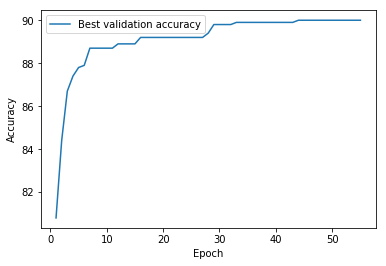

In [22]:
L = []
for i in range(55):
    L.append(i+1)
plt.plot(L, result, label = 'Best validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> replace the example image with your own tensorboard graph screenshot.
![Tensorboard_2](./utils/notebook_images/myans.png)

In [24]:
# show the graph if you want
from utils.neuralnets.cnn.jupyter_tensorboard import show_graph 
tf.reset_default_graph()
# TODO: Your code here
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/lenet_1572650633.meta')
    graph = tf.get_default_graph()
    show_graph(graph)